<a href="https://colab.research.google.com/github/vmacf/redes_neurais/blob/master/CNN/Rede_Neural_Lenet_e_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Rede Neural Convolucional

### Nessa aula, vamos treinar a rede Neural VGG com a base de dados CIFAR-10

---

### 1. Carrega a Base de dados CIFAR-10

In [0]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

###2. Reescale as imagens dividindo todos os pixels por 255

In [0]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 3.  Dividir base de dados em conjuntos de treinamento, teste e validação.

In [0]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 4. Comece importando os pacotes necessários para o projeto

In [0]:
# import the necessary packages
#from pyimagesearch.nn.conv import LeNet
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense

### 5. Construa o modelo Lenet

In [0]:
def build_LeNet(width, height, depth, classes):
  # initialize the model
  model = Sequential()
  inputShape = (height, width, depth)

  # first set of CONV => RELU => POOL layers
  model.add(Conv2D(20, (5, 5), padding="same",
    input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  # second set of CONV => RELU => POOL layers
  model.add(Conv2D(50, (5, 5), padding="same"))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  # first (and only) set of FC => RELU layers
  model.add(Flatten())
  model.add(Dense(500))
  model.add(Activation("relu"))

  # softmax classifier
  model.add(Dense(classes))
  model.add(Activation("softmax"))
  
  model.summary()
  
  # return the constructed network architecture
  return model

### 6. Construa o modelo MiniVGG

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dropout

def build_MiniVGG(width, height, depth, classes):
  # initialize the model
  model = Sequential()
  inputShape = (height, width, depth)# first CONV => RELU => CONV => RELU => POOL layer set
  model.add(Conv2D(32, (3, 3), padding="same",
  input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Conv2D(32, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  # second CONV => RELU => CONV => RELU => POOL layer set
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  # first (and only) set of FC => RELU layers
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  # softmax classifier
  model.add(Dense(classes))
  model.add(Activation("softmax"))
  
  model.summary()
  
  # return the constructed network architecture
  return model
  

### 7. Compile o modelo desejado (Lenet ou MiniVGG)

In [0]:
opt = SGD(lr=0.01)
model = build_MiniVGG(width=32, height=32, depth=3, classes=10)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
                  metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
__________

### 8. Treine o Modelo

In [0]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 14s - loss: 2.3739 - acc: 0.2794 - val_loss: 1.6038 - val_acc: 0.4348

Epoch 00001: val_loss improved from inf to 1.60379, saving model to model.weights.best.hdf5
Epoch 2/20
 - 10s - loss: 1.7763 - acc: 0.3959 - val_loss: 1.4138 - val_acc: 0.4956

Epoch 00002: val_loss improved from 1.60379 to 1.41383, saving model to model.weights.best.hdf5
Epoch 3/20
 - 10s - loss: 1.5654 - acc: 0.4528 - val_loss: 1.5405 - val_acc: 0.4518

Epoch 00003: val_loss did not improve from 1.41383
Epoch 4/20
 - 10s - loss: 1.4175 - acc: 0.4969 - val_loss: 1.2163 - val_acc: 0.5706

Epoch 00004: val_loss improved from 1.41383 to 1.21631, saving model to model.weights.best.hdf5
Epoch 5/20
 - 10s - loss: 1.3287 - acc: 0.5282 - val_loss: 1.1496 - val_acc: 0.5886

Epoch 00005: val_loss improved from 1.21631 to 1.14965, saving model to model.weights.best.hdf5
Epoch 6/20
 - 10s - loss: 1.2437 - acc: 0.5564 

### 9. Carrege o modelo com a melhor acurácia no conjunto de validação

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### **10**. Calcule a acurácia no conjunto de teste

In [0]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7209


### **11**. Informações sobre acurácia no treinamento

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.76      0.75      0.75      1000
  automobile       0.82      0.86      0.84      1000
        bird       0.72      0.49      0.58      1000
         cat       0.50      0.60      0.54      1000
        deer       0.65      0.70      0.68      1000
         dog       0.67      0.54      0.60      1000
        frog       0.71      0.87      0.78      1000
       horse       0.80      0.76      0.78      1000
        ship       0.83      0.82      0.83      1000
       truck       0.79      0.82      0.80      1000

   micro avg       0.72      0.72      0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



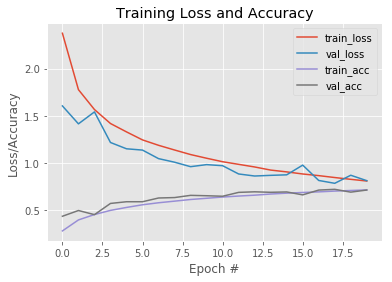

In [0]:
# evaluate the network
print("[INFO] evaluating network...")

# get predictions on the test set
predictions = model.predict(x_test, batch_size=128)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


print(classification_report(y_test.argmax(axis=1),
predictions.argmax(axis=1),
target_names=cifar10_labels))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), hist.history["loss"], label="train_loss" )
plt.plot(np.arange(0, 20), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), hist.history["acc" ], label="train_acc" )
plt.plot(np.arange(0, 20), hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

##Exercício

1. Compare a arquitetura criada LENET com a AlexNet. Quais são as principais diferenças? Formule uma nova arquitetura da AlexNet.

2. Compare a arquitetura criada MiniVGG com a VGG16. Quais são as principais diferenças? Formule uma nova arquitetura VGG16.